In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-acceptability-classification-dataset/car.csv
/kaggle/input/car-acceptability-classification-dataset/car.data


In [2]:
df_car = pd.read_csv("/kaggle/input/car-acceptability-classification-dataset/car.csv")
df_car.head(10)

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [3]:
df_car.shape

(1728, 7)

# EDA

**Unique & Missing Value**

In [4]:
for kolom in (df_car.columns):
    print ("\nNilai unique dari", kolom, "\n", df_car[kolom].unique())
    print ("--------------")


Nilai unique dari Buying_Price 
 ['vhigh' 'high' 'med' 'low']
--------------

Nilai unique dari Maintenance_Price 
 ['vhigh' 'high' 'med' 'low']
--------------

Nilai unique dari No_of_Doors 
 ['2' '3' '4' '5more']
--------------

Nilai unique dari Person_Capacity 
 ['2' '4' 'more']
--------------

Nilai unique dari Size_of_Luggage 
 ['small' 'med' 'big']
--------------

Nilai unique dari Safety 
 ['low' 'med' 'high']
--------------

Nilai unique dari Car_Acceptability 
 ['unacc' 'acc' 'vgood' 'good']
--------------


In [5]:
for kolom in (df_car.columns):
    print ("\nTotal nilai Nan dari", kolom, "\n", df_car[kolom].isna().sum())
    print ("--------------")


Total nilai Nan dari Buying_Price 
 0
--------------

Total nilai Nan dari Maintenance_Price 
 0
--------------

Total nilai Nan dari No_of_Doors 
 0
--------------

Total nilai Nan dari Person_Capacity 
 0
--------------

Total nilai Nan dari Size_of_Luggage 
 0
--------------

Total nilai Nan dari Safety 
 0
--------------

Total nilai Nan dari Car_Acceptability 
 0
--------------


> Njir bersih datanya :v

# Visualisasi Data

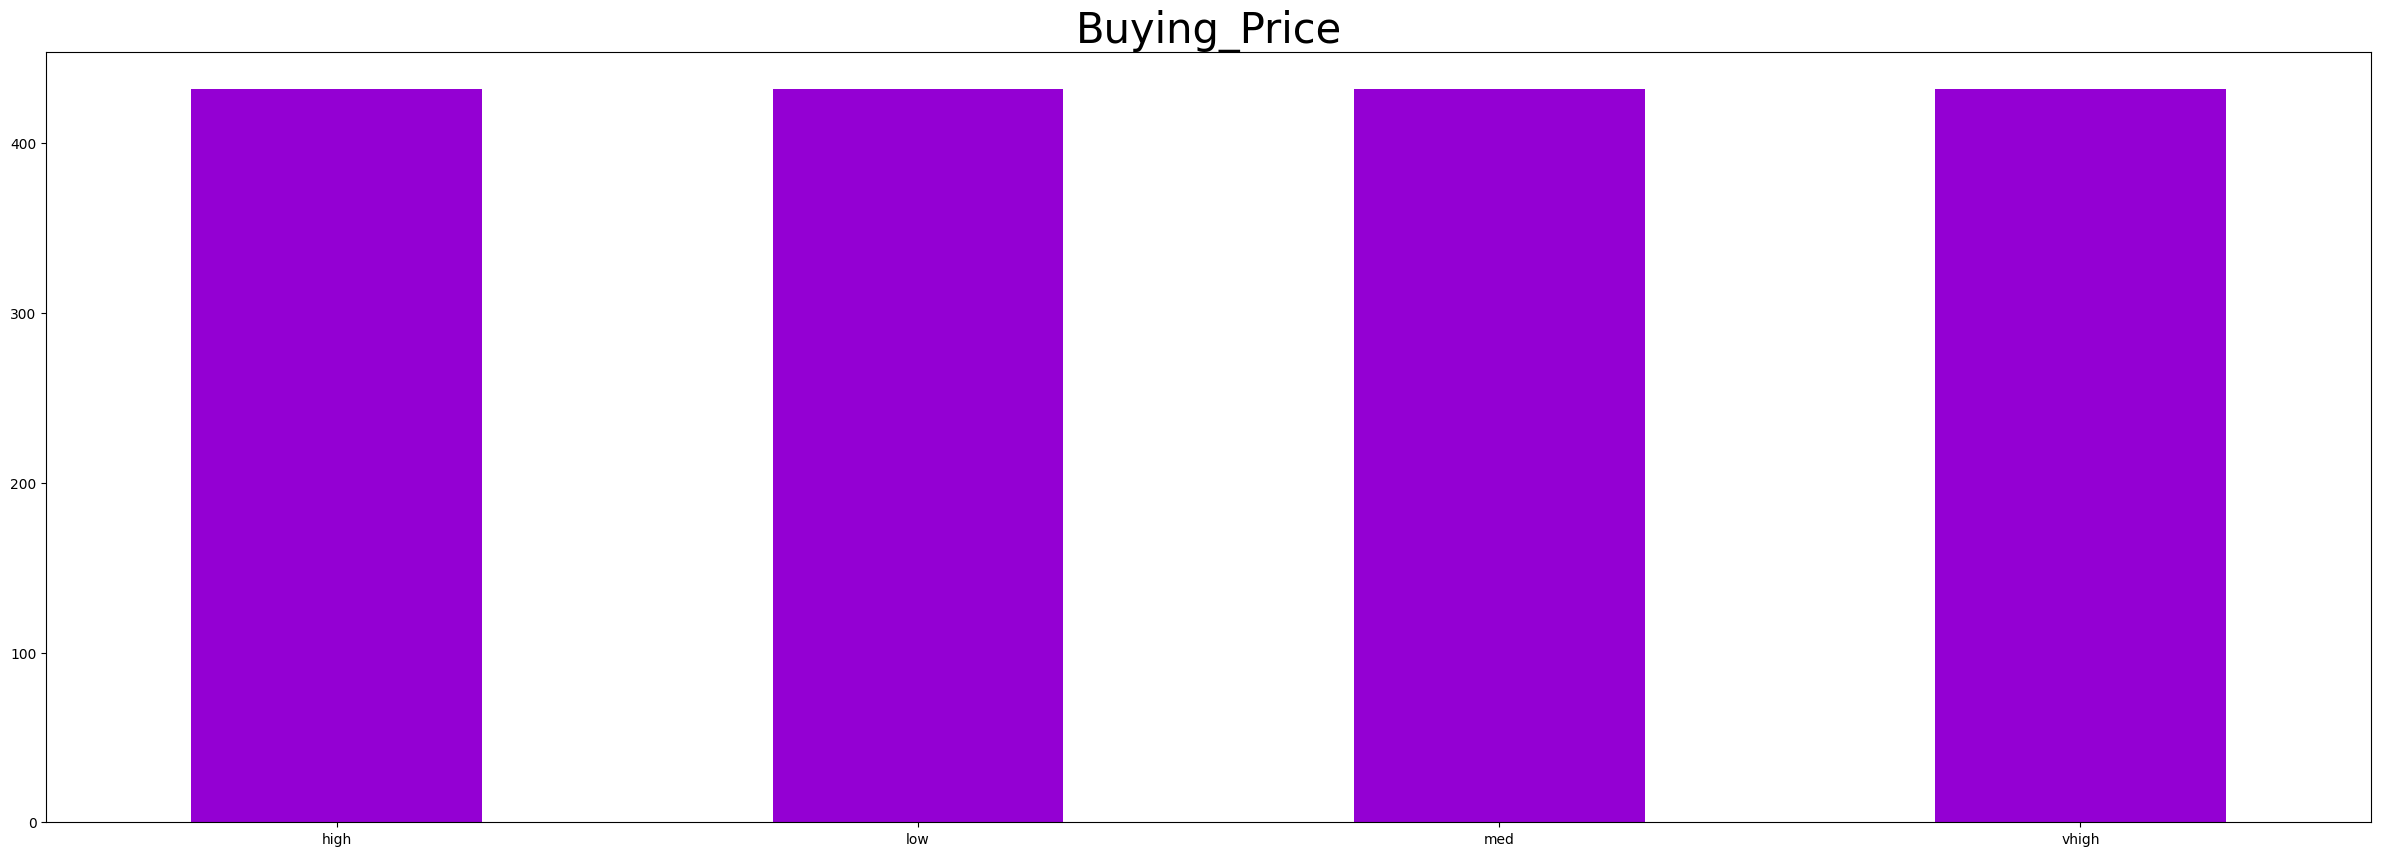

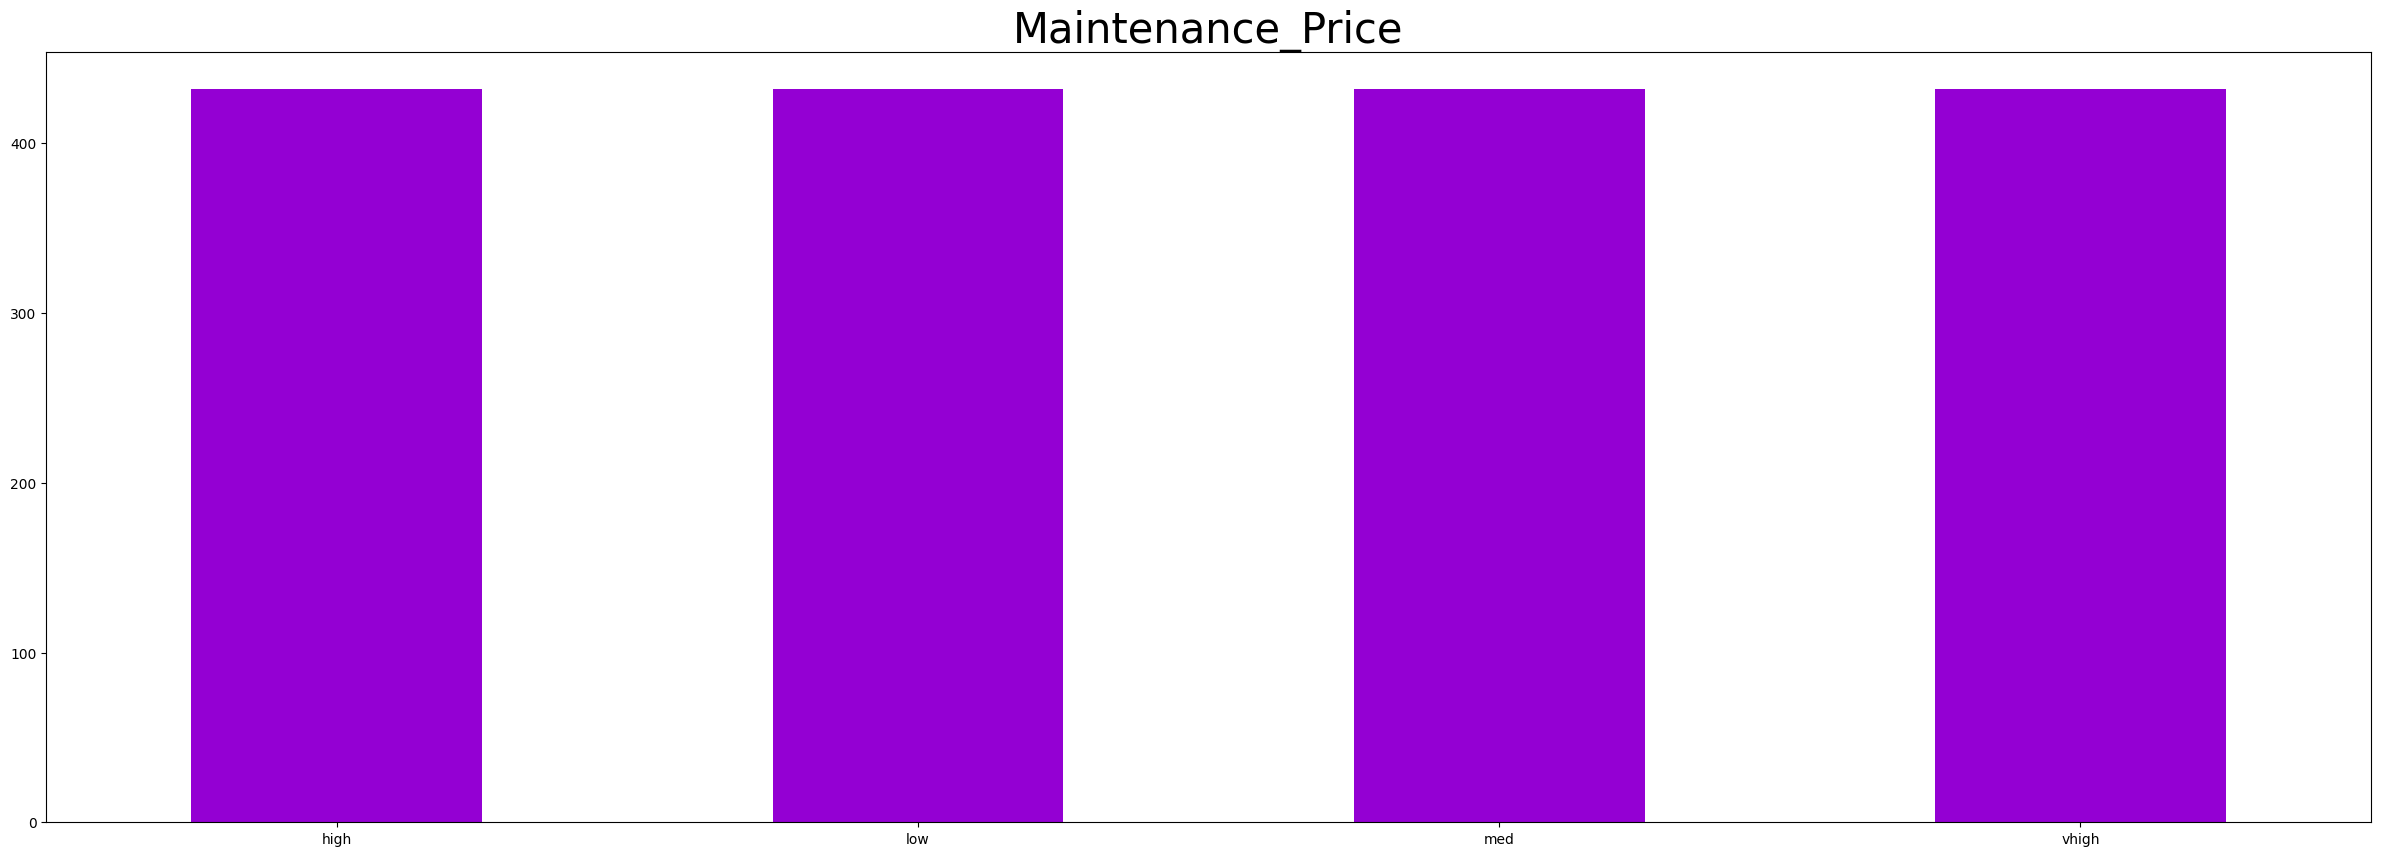

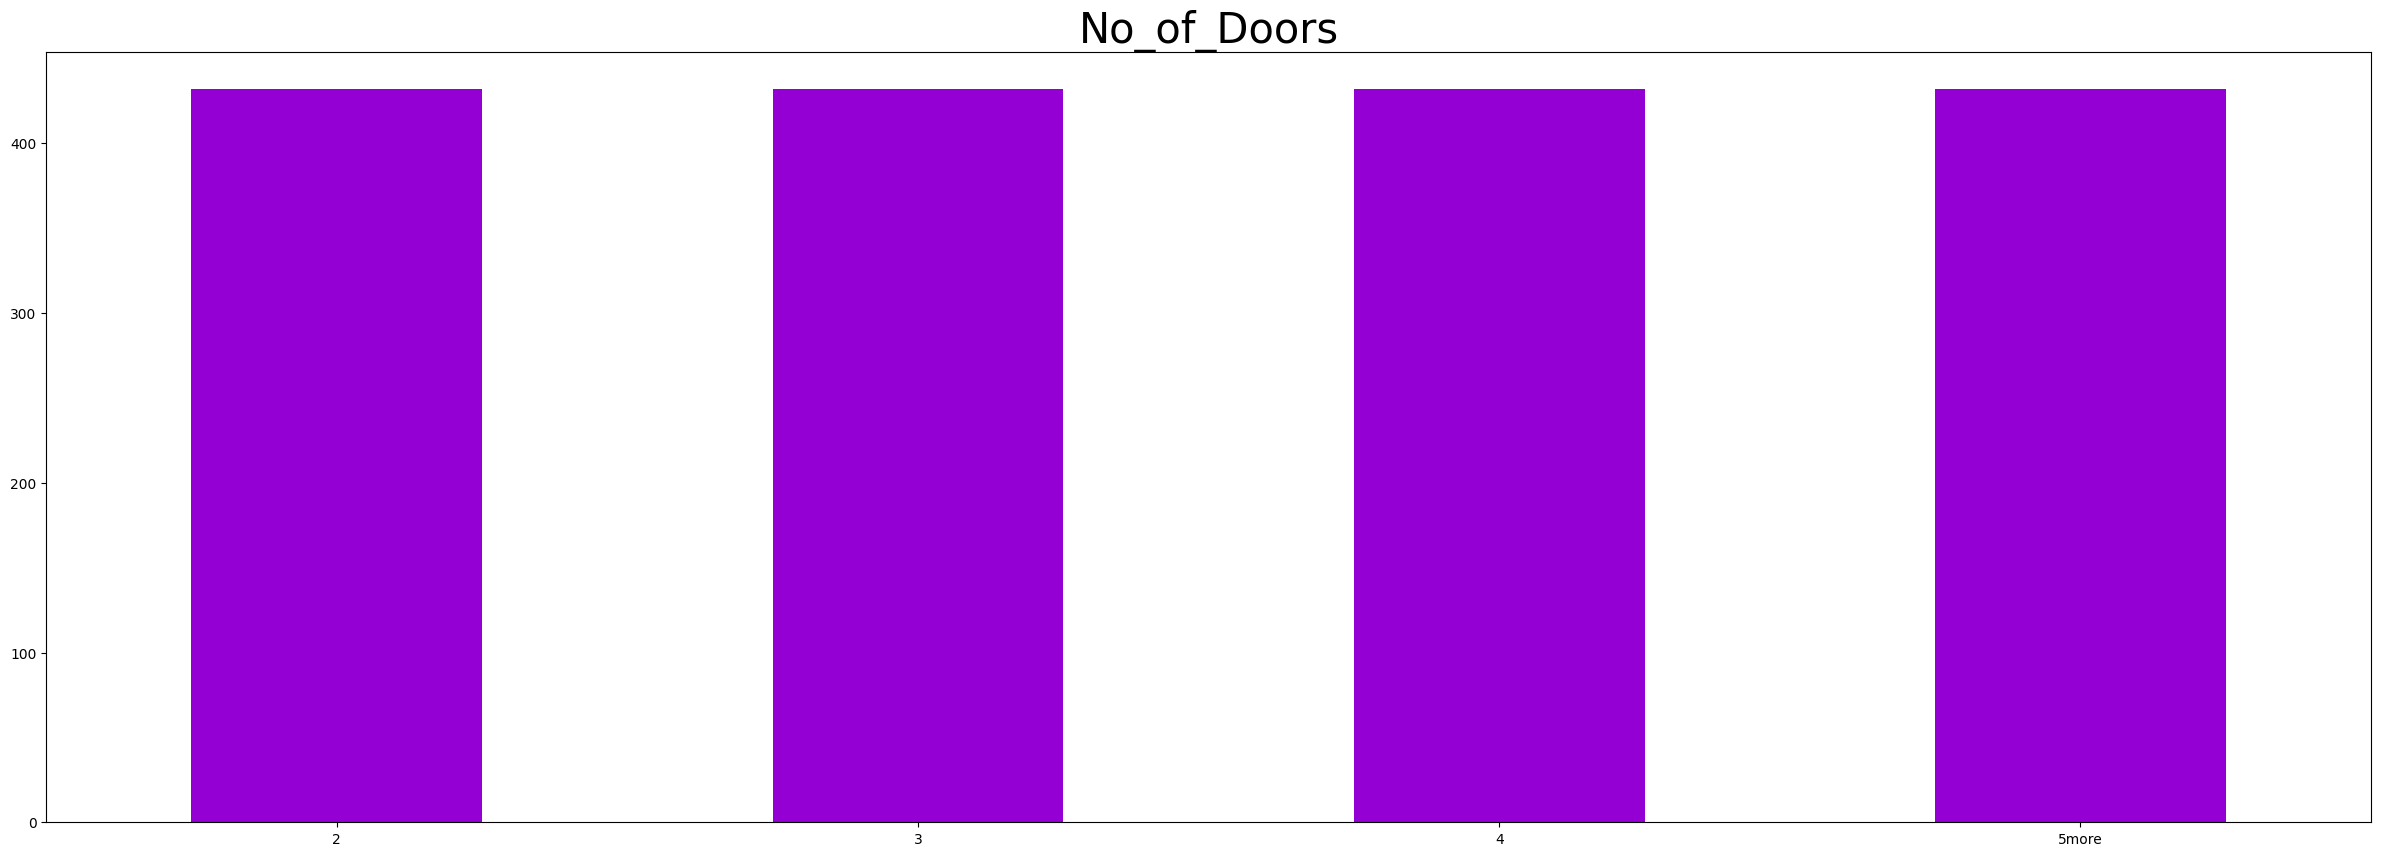

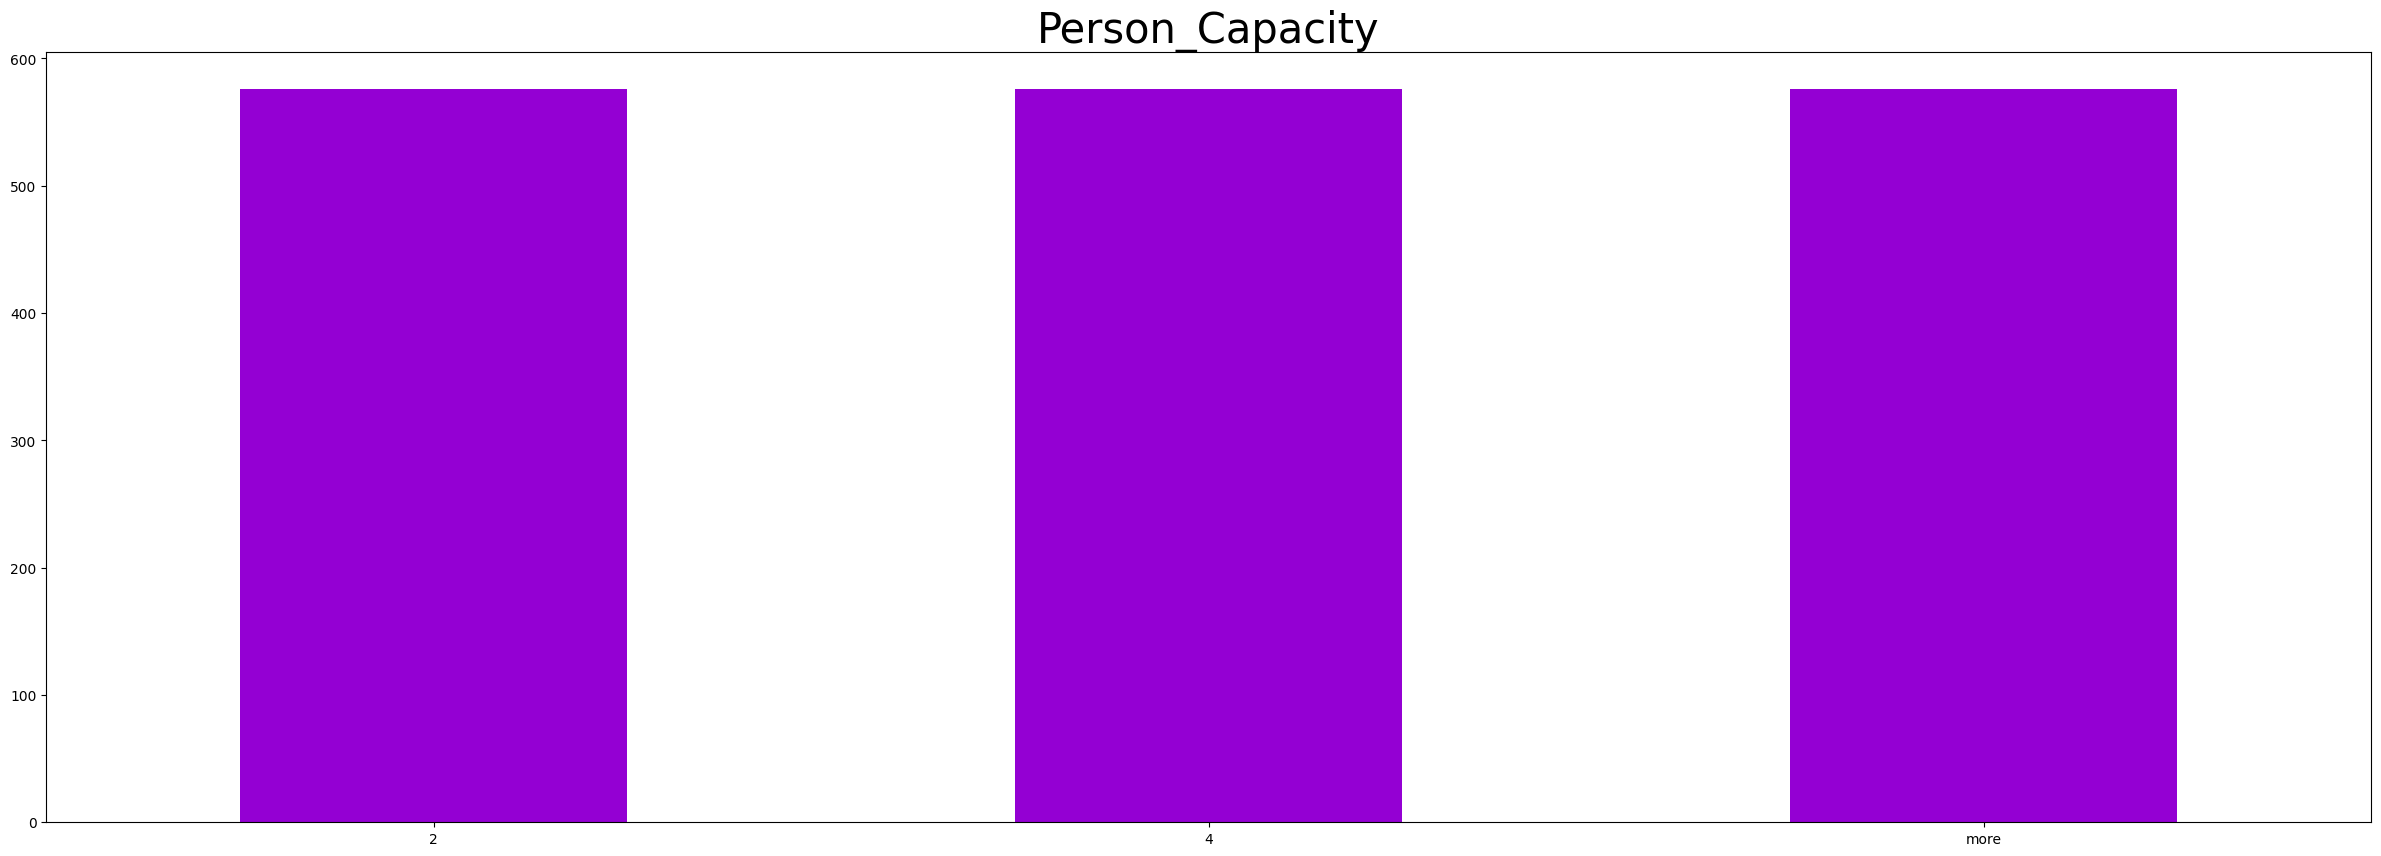

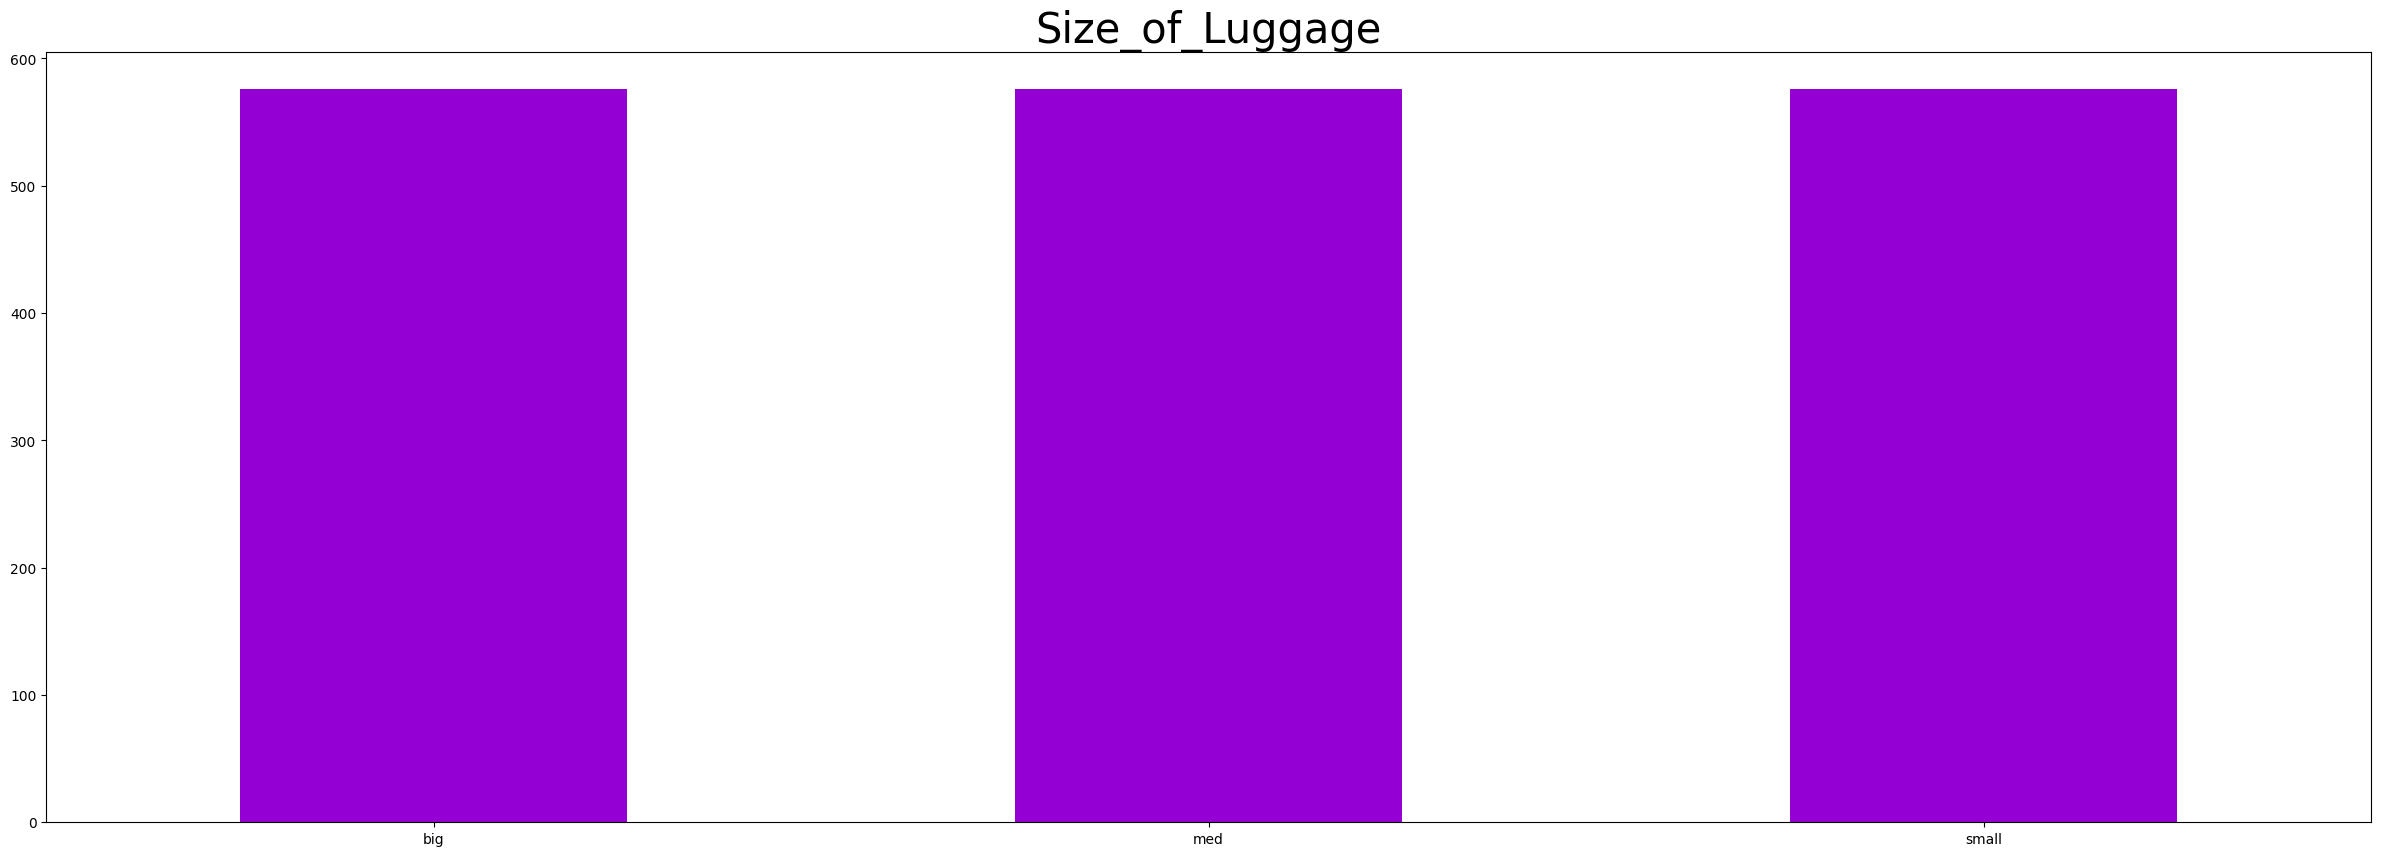

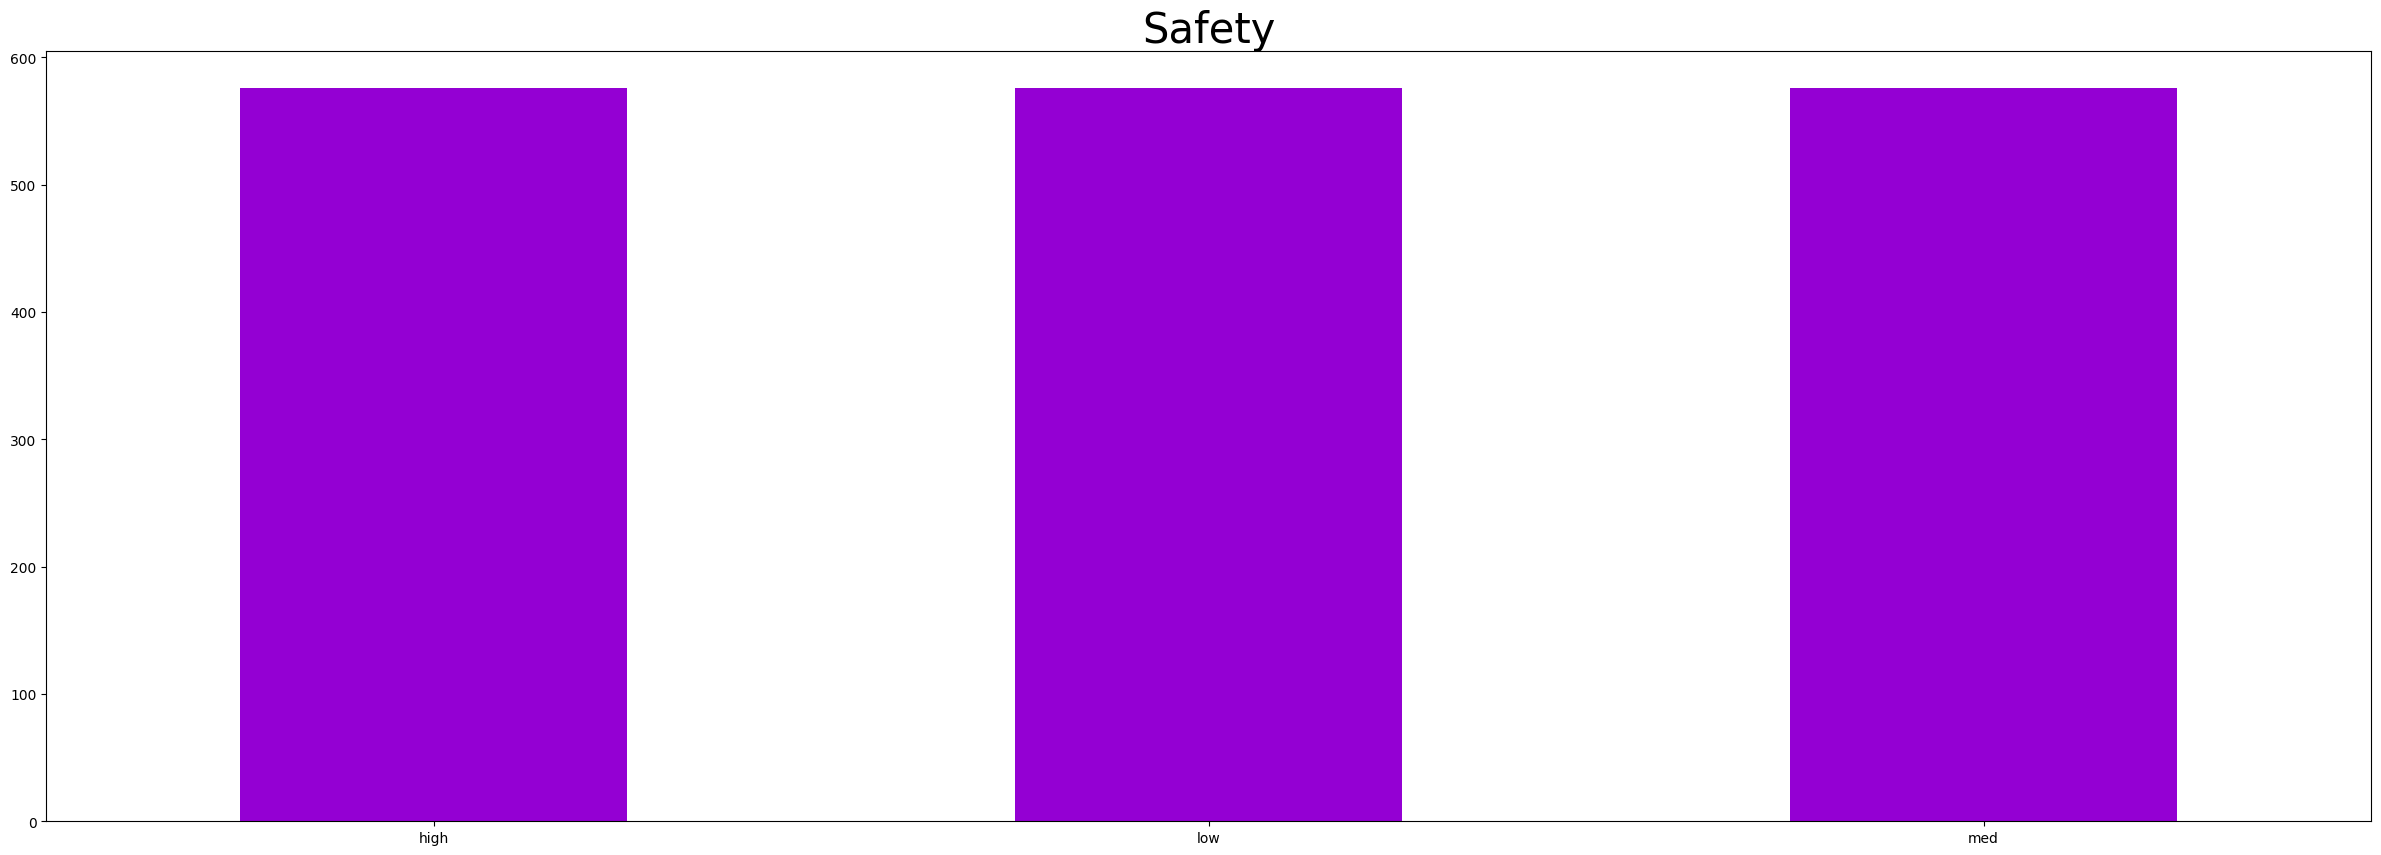

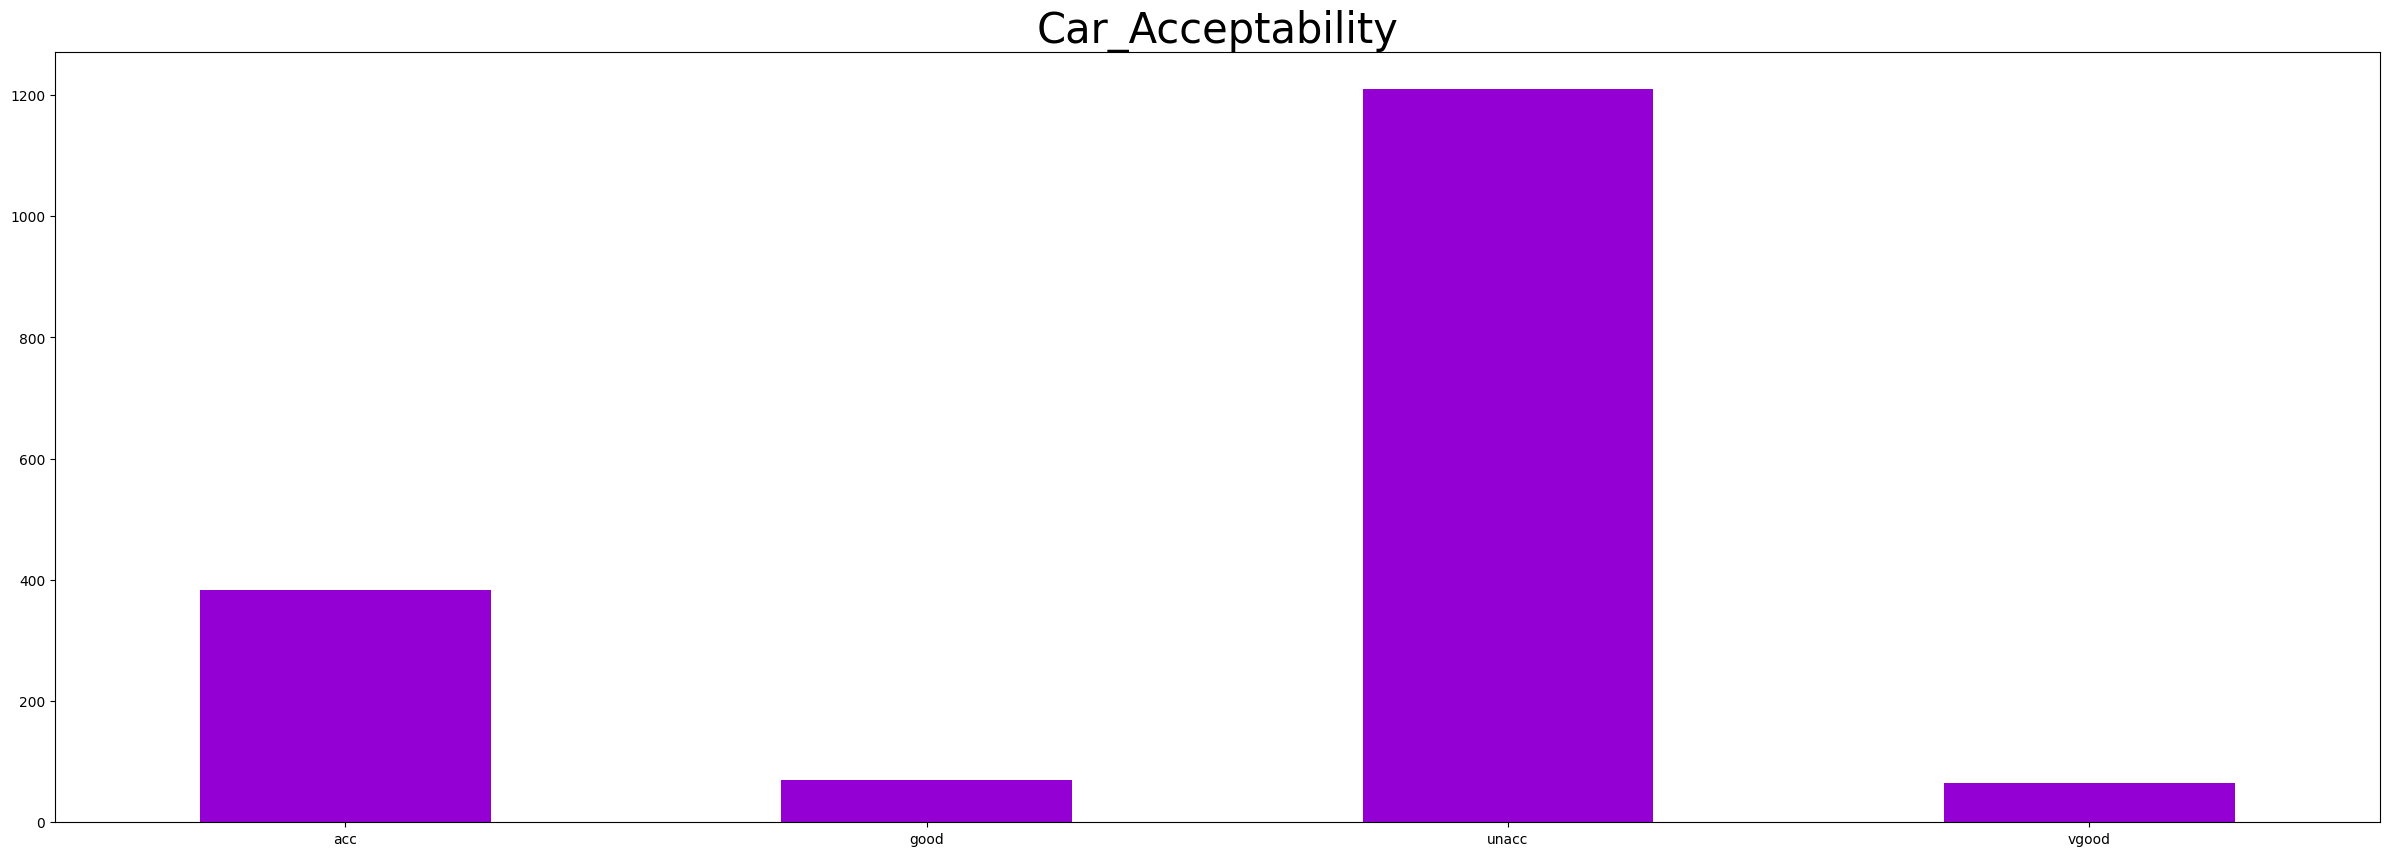

In [6]:
import matplotlib.pyplot as plt
df_train_object = df_car
df_train_object = df_train_object.astype(str)
df_train_object.replace(np.nan, 'Nan', inplace=True)


for col in df_train_object:
    plt.figure(figsize=(30,10))
    plt.title(col, fontsize = 30)
    df_train_object[col].value_counts().sort_index().plot(kind= 'bar', rot = 0, color = 'darkviolet')
    plt.show()

> Datanya bagus banget

# Label Data

In [7]:
df_car['Buying_Price'].replace({'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}, inplace = True)
df_car['Maintenance_Price'].replace({'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}, inplace = True)
df_car['No_of_Doors'].replace({'5more': 5}, inplace = True)
df_car['Person_Capacity'].replace({'more': 5}, inplace = True)
df_car['Size_of_Luggage'].replace({'small': 0, 'med': 1, 'big': 2}, inplace = True)
df_car['Safety'].replace({'low': 0, 'med': 1, 'high': 2}, inplace = True)
df_car['Car_Acceptability'].replace({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}, inplace = True)
df_car

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


# SVM (dan turunannya)

In [8]:
from sklearn.model_selection import train_test_split

X = df_car.drop(columns = 'Car_Acceptability')
y = df_car['Car_Acceptability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**METODE**
1. LDA (Linear Discriminant Analysis)
2. QDA (Quadratic Discriminant Analysis)
3. SVC (Support Vector Classifier)

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

> Menggunakan Pipeline dan membandingkan tiap model

In [10]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

lda_pipe = Pipeline ([
    ('scaler', StandardScaler()),
    ('lda', LDA())
])

qda_pipe = Pipeline ([
    ('scaler', StandardScaler()),
    ('qda', QDA())
])

svm_pipe = Pipeline ([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

pipa = [lda_pipe, qda_pipe, svm_pipe]

best_model = None
best_f1_score = ""

for pipeline in pipa:
    pipeline.fit (X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    
    if report > best_f1_score:
        best_f1_score = report
        best_model = pipeline

print(f"The best model is {best_model.named_steps['svm'].__class__.__name__} with the following classification report:\n{best_f1_score}")

The best model is SVC with the following classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       358
           1       0.93      0.91      0.92       118
           2       0.74      0.89      0.81        19
           3       0.91      0.83      0.87        24

    accuracy                           0.96       519
   macro avg       0.89      0.91      0.90       519
weighted avg       0.96      0.96      0.96       519



# Hyperparameter Tuning SVC

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}
random_opt = RandomizedSearchCV(SVC(), param_grid, cv=stratified_cv)
random_opt.fit(X_train, y_train)
print("Hyperparameter terbaik:", random_opt.best_params_)

# Mengevaluasi model pada set pengujian
accuracy = random_opt.score(X_test, y_test)
print("Akurasi model terbaik:", accuracy)

Hyperparameter terbaik: {'gamma': 0.1, 'C': 100}
Akurasi model terbaik: 0.9749518304431599


# SVC

In [12]:
svc = SVC()
svc.set_params(gamma = 0.1)
svc.set_params(C = 10)

svm_pipe = Pipeline ([
    ('scaler', StandardScaler()),
    ('svm', svc)
])

svm_pipe.fit(X_train, y_train)
y_pred = svm_pipe.predict (X_test)

report = classification_report(y_test, y_pred)

print (report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       358
           1       0.95      0.90      0.93       118
           2       0.77      0.89      0.83        19
           3       0.88      0.96      0.92        24

    accuracy                           0.96       519
   macro avg       0.90      0.94      0.92       519
weighted avg       0.96      0.96      0.96       519



# Confusion Matrix

<AxesSubplot: >

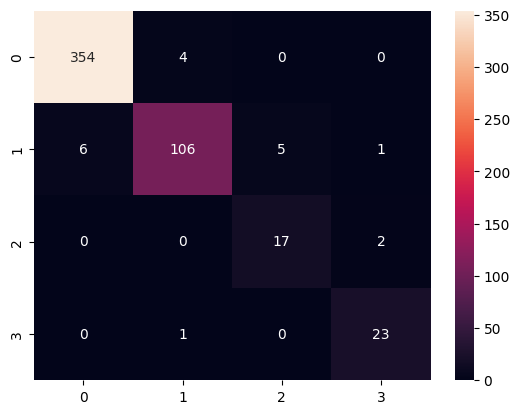

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')